Prediksi kelas untuk data uji: Elevated Proneness


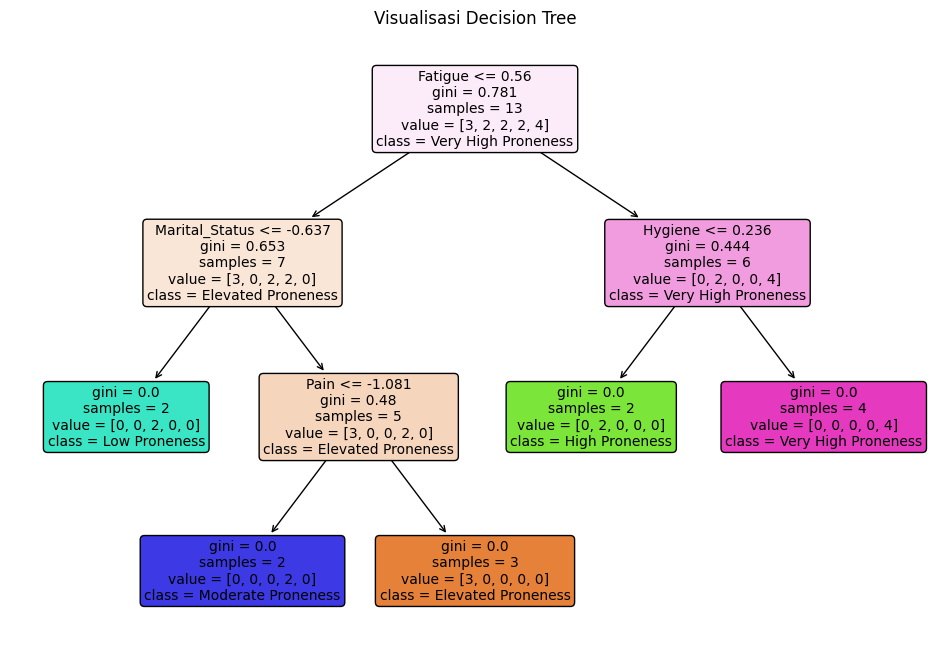

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Baca data
df = pd.read_excel("../dataset/schizoCase.xlsx")

# 2. Pisahkan data training dan data uji
data_train = df.iloc[:-1, :]
data_test = df.iloc[-1:, :]

# 3. Ambil hanya kolom numerik
X_train = data_train.select_dtypes(include='number').iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.select_dtypes(include='number').iloc[:, :-1]

# 4. (Opsional) Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Decision Tree
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0)
clf.fit(X_train_scaled, y_train)

# 6. Prediksi data uji
prediction = clf.predict(X_test_scaled)
print("Prediksi kelas untuk data uji:", prediction[0])

# 7. Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in clf.classes_], 
          rounded=True,
          fontsize=10)
plt.title("Visualisasi Decision Tree")
plt.show()
